In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    precision_recall_curve, roc_curve, roc_auc_score)

In [2]:
dataR1 = pd.read_csv('/Users/ismaelcisse/Downloads/data_no_out.csv')

In [3]:
dataR1

,Unnamed: 0,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6729,6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6730,6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6731,6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6732,6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [4]:
dataR1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6734 entries, 0 to 6733
Data columns (total 97 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Unnamed: 0                                               6734 non-null   int64  
 1   Bankrupt?                                                6734 non-null   int64  
 2   ROA(C) before interest and depreciation before interest  6734 non-null   float64
 3   ROA(A) before interest and  after tax                    6734 non-null   float64
 4   ROA(B) before interest and depreciation after tax        6734 non-null   float64
 5   Operating Gross Margin                                   6734 non-null   float64
 6   Realized Sales Gross Margin                              6734 non-null   float64
 7   Operating Profit Rate                                    6734 non-null   float64
 8   Pre-tax net Interest Rate   

In [25]:
dataR1.describe()

,Unnamed: 0,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6734.000000,6734.000000,6734.000000,6734.000000,6734.000000,6734.000000,6734.000000,6734.000000,6734.000000,6734.000000,...,6734.000000,6.734000e+03,6734.000000,6734.000000,6734.000000,6734.000000,6734.000000,6734.000000,6734.0,6734.000000
mean,3414.269231,0.030591,0.505854,0.559361,0.554307,0.608042,0.608023,0.998984,0.797409,0.809320,...,0.808345,1.792902e+07,0.624013,0.608040,0.840589,0.280162,0.027550,0.565334,1.0,0.046629
std,1972.700854,0.172220,0.058910,0.063503,0.059664,0.013262,0.013239,0.000656,0.001068,0.000984,...,0.037597,3.749427e+08,0.009677,0.013262,0.008148,0.007612,0.015766,0.013168,0.0,0.041048
min,0.000000,0.000000,0.024277,0.000000,0.033514,0.432653,0.432653,0.973424,0.752969,0.766198,...,0.411809,1.015558e-04,0.408682,0.432654,0.344652,0.209222,0.000000,0.000000,1.0,0.008753
25%,1694.250000,0.000000,0.477173,0.536088,0.527825,0.600492,0.600486,0.998970,0.797387,0.809313,...,0.796963,9.038746e-04,0.623640,0.600492,0.840123,0.276952,0.026791,0.565158,1.0,0.024583
50%,3427.500000,0.000000,0.503022,0.560020,0.552492,0.606005,0.605983,0.999023,0.797464,0.809376,...,0.810768,2.074227e-03,0.623881,0.606004,0.841184,0.278769,0.026809,0.565254,1.0,0.033907
75%,5124.750000,0.000000,0.535855,0.589457,0.584600,0.613858,0.613736,0.999095,0.797579,0.809469,...,0.826600,5.240739e-03,0.624168,0.613859,0.842356,0.281423,0.026914,0.565729,1.0,0.052838
max,6818.000000,1.000000,0.971530,1.000000,1.000000,0.665151,0.666023,0.999706,0.812848,0.822551,...,1.000000,9.820000e+09,1.000000,0.665149,0.996912,0.643692,1.000000,1.000000,1.0,0.551868


In [26]:
dataR1.shape

(6734, 97)

In [27]:
X = dataR1.drop(columns=['Bankrupt?','Unnamed: 0'])
Y = dataR1['Bankrupt?']

In [14]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=532)

In [27]:
#scaler = StandardScaler()
#X_train_normalized = scaler.fit_transform(X_train)
#X_test_normalized = scaler.fit_transform(X_test)

In [24]:
#model = LogisticRegression()

In [36]:
#model.fit(X_train_normalized, Y_train)
#Y_scores = model.predict_proba(X_train_normalized)
#Y_score = Y_scores

/Users/ismaelcisse/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
#scaler = MinMaxScaler()
#X_scaled = scaler.fit_transform(X)

In [32]:
#datasetR1 = pd.DataFrame(X_scaled)

In [35]:
#datasetR1.describe()

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
count,6734.000000,6734.000000,6734.000000,6734.000000,6734.000000,6734.000000,6734.000000,6734.000000,6734.000000,6734.000000,...,6734.000000,6.734000e+03,6734.000000,6734.000000,6734.000000,6734.000000,6734.000000,6734.000000,6734.0,6734.000000
mean,0.508393,0.559361,0.538852,0.754369,0.751469,0.972528,0.742157,0.765217,0.546373,0.764315,...,0.674162,1.825765e-03,0.364155,0.754366,0.760337,0.163280,0.027550,0.565334,0.0,0.069738
std,0.062190,0.063503,0.061733,0.057040,0.056729,0.024949,0.017830,0.017467,0.015208,0.017015,...,0.063919,3.818153e-02,0.016366,0.057041,0.012493,0.017519,0.015766,0.013168,0.0,0.075579
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.478115,0.536088,0.511452,0.721893,0.719173,0.972017,0.741789,0.765084,0.545349,0.764146,...,0.654810,8.170253e-14,0.363524,0.721897,0.759622,0.155891,0.026791,0.565158,0.0,0.029146
50%,0.505404,0.560020,0.536974,0.745606,0.742727,0.974004,0.743081,0.766201,0.546347,0.765260,...,0.678281,2.008830e-13,0.363931,0.745606,0.761248,0.160074,0.026809,0.565254,0.0,0.046315
75%,0.540065,0.589457,0.570196,0.779385,0.775948,0.976737,0.744991,0.767859,0.547362,0.766884,...,0.705198,5.233384e-13,0.364416,0.779395,0.763046,0.166182,0.026914,0.565729,0.0,0.081171
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [11]:
# X/y split
#X = diabetes.drop('Outcome',axis = 1)
#y = diabetes['Outcome']

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=34)

In [16]:
X = dataR1.drop(columns=['Bankrupt?','Unnamed: 0'])
Y = dataR1['Bankrupt?']

In [17]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [20]:
Y_pred = rf.predict(X_test)

In [28]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9673348181143281


In [ ]:
#for i in range(3):
#    tree = rf.estimators_[i]
#    dot_data = export_graphviz(tree,
#                               feature_names=X_train.columns,  
#                               filled=True,  
#                               max_depth=2, 
#                               impurity=False, 
#                               proportion=True)
#    graph = graphviz.Source(dot_data)
#    display(graph)

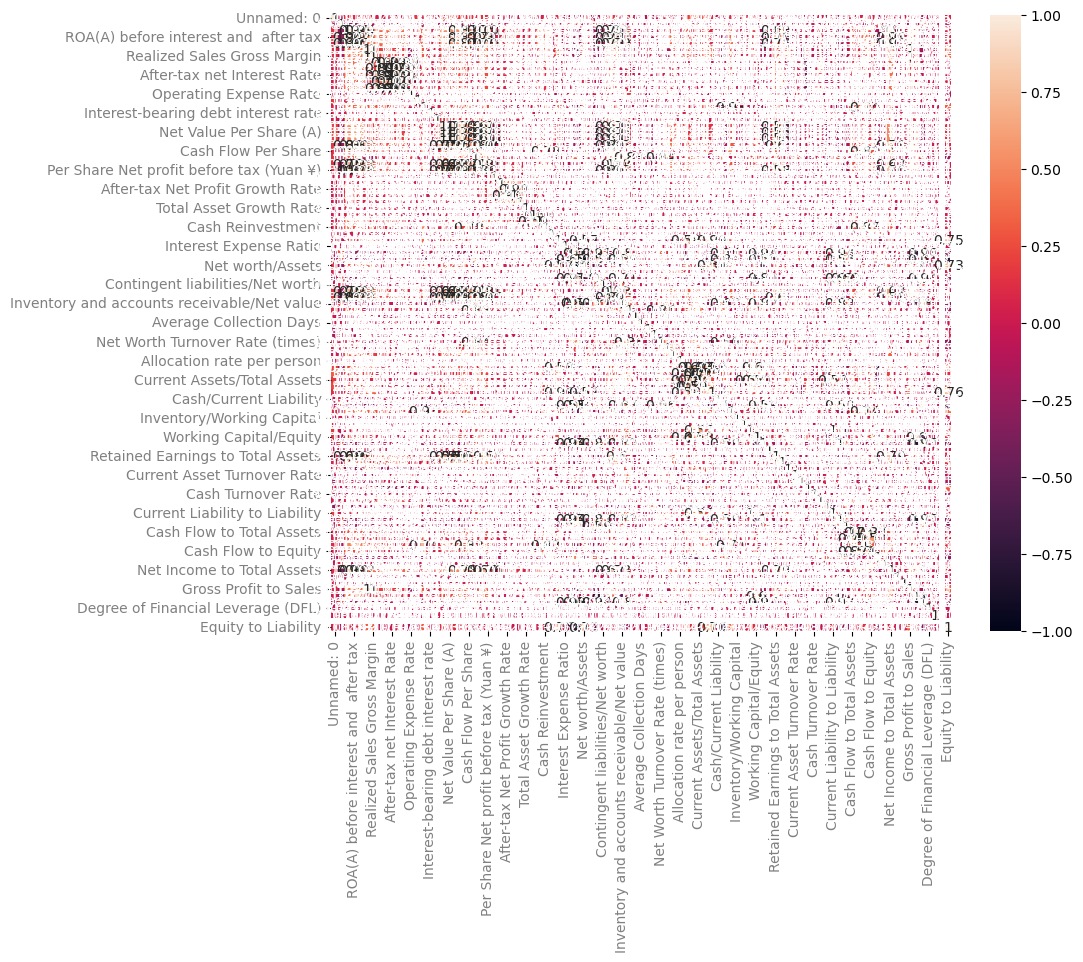

In [9]:
correlations_matrix = dataR1.corr()
fig, ax = plt.subplots(figsize=(10, 8))
g = sns.heatmap(correlations_matrix, annot=True)
for tick_label in g.axes.get_yticklabels():
    tick_label.set_color("grey")
    tick_label.set_fontsize("10")
for tick_label in g.axes.get_xticklabels():
    tick_label.set_color("grey")
    tick_label.set_fontsize("10")
plt.show()

In [23]:
accuracies_train = []
accuracies_test = []
params_grid = list(range(1, 30))

for param_value in tqdm(params_grid):
    model = RandomForestClassifier(max_depth=param_value, random_state=98)
    model.fit(X_train, Y_train)
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    accuracies_train.append(np.mean(Y_train_pred == Y_train))
    accuracies_test.append(np.mean(Y_test_pred == Y_test))

NameError: name 'tqdm' is not defined